In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [214]:
df_loan=pd.read_csv('project7_loanpred.csv')
df_loan=pd.DataFrame(df_loan)
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


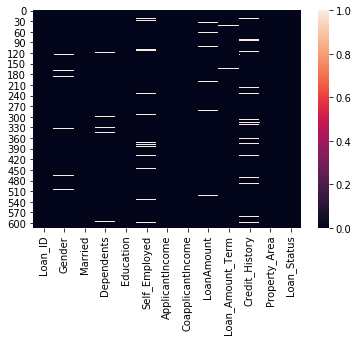

In [215]:
#checking for any missing data
sns.heatmap(df_loan.isnull())

In [216]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [217]:
for i in df_loan.columns:
    print(df_loan[i].value_counts())
#We get the mode of all the attributes from here which can be used to fill the missing values

LP002129    1
LP002401    1
LP001404    1
LP002689    1
LP002622    1
           ..
LP002640    1
LP001722    1
LP001713    1
LP002408    1
LP001800    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: L

In [218]:
df_loan.dtypes
#checking the datatypes which is essential to determine which replacing method to be used

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [219]:
df_loan['Dependents'].fillna('0',inplace=True)
#Filled the null values with mode of 'Dependents' which is '0' as we can see from above

In [220]:
df_loan['Self_Employed'].fillna('No',inplace=True)
#Filled the null values with mode of 'Self_Employed' which is 'No' as we can see from above

In [221]:
df_loan['LoanAmount'].replace(np.NaN,df_loan['LoanAmount'].mean(),inplace=True)

In [222]:
df_loan['Loan_Amount_Term'].fillna(360.0,inplace=True)
#Filled the null values with mode of 'Loan_Amount_Term' which is '360.0' as we can see from above

In [223]:
df_loan['Credit_History'].fillna(1.0,inplace=True)
#Filled the null values with mode of 'Credit_History' which is '1.0' as we can see from above

In [224]:
df_loan.dropna(inplace=True)
#removing the remaining null values from the dataset ( Gender and Married attributes)

In [225]:
df_loan.isnull().sum()
#No missing data

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [226]:
for i in df_loan.columns:
    print(df_loan[i].value_counts())
#Checking the value counts again    

LP002129    1
LP002622    1
LP001243    1
LP001087    1
LP001935    1
           ..
LP001722    1
LP001713    1
LP002634    1
LP002637    1
LP001800    1
Name: Loan_ID, Length: 598, dtype: int64
Male      487
Female    111
Name: Gender, dtype: int64
Yes    388
No     210
Name: Married, dtype: int64
0     350
1     101
2      99
3+     48
Name: Dependents, dtype: int64
Graduate        465
Not Graduate    133
Name: Education, dtype: int64
No     520
Yes     78
Name: Self_Employed, dtype: int64
2500    9
2600    6
6000    6
4583    6
5000    5
       ..
5819    1
5821    1
2750    1
3775    1
3691    1
Name: ApplicantIncome, Length: 491, dtype: int64
0.0       265
1666.0      5
2083.0      5
2500.0      5
1625.0      3
         ... 
1417.0      1
1863.0      1
7166.0      1
2426.0      1
4583.0      1
Name: CoapplicantIncome, Length: 283, dtype: int64
146.412162    21
120.000000    20
110.000000    16
100.000000    15
187.000000    12
              ..
65.000000      1
156.000000     1
296

In [227]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [228]:
#checking the basic info about the attributes and their counts
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.4+ KB


In [229]:
#checking the maximum and minimum values of each attribute and their percentiles
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,5292.252508,1631.499866,145.019491,342.341137,0.856187
std,5807.265364,2953.315785,81.236999,64.494977,0.351193
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3806.000000,1211.500000,128.000000,360.000000,1.000000
75%,5746.000000,2324.000000,163.500000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [230]:
df_loan['Loan_Status'].value_counts()
#Value counts of the dependent variable

Y    411
N    187
Name: Loan_Status, dtype: int64

# Univariate Analysis

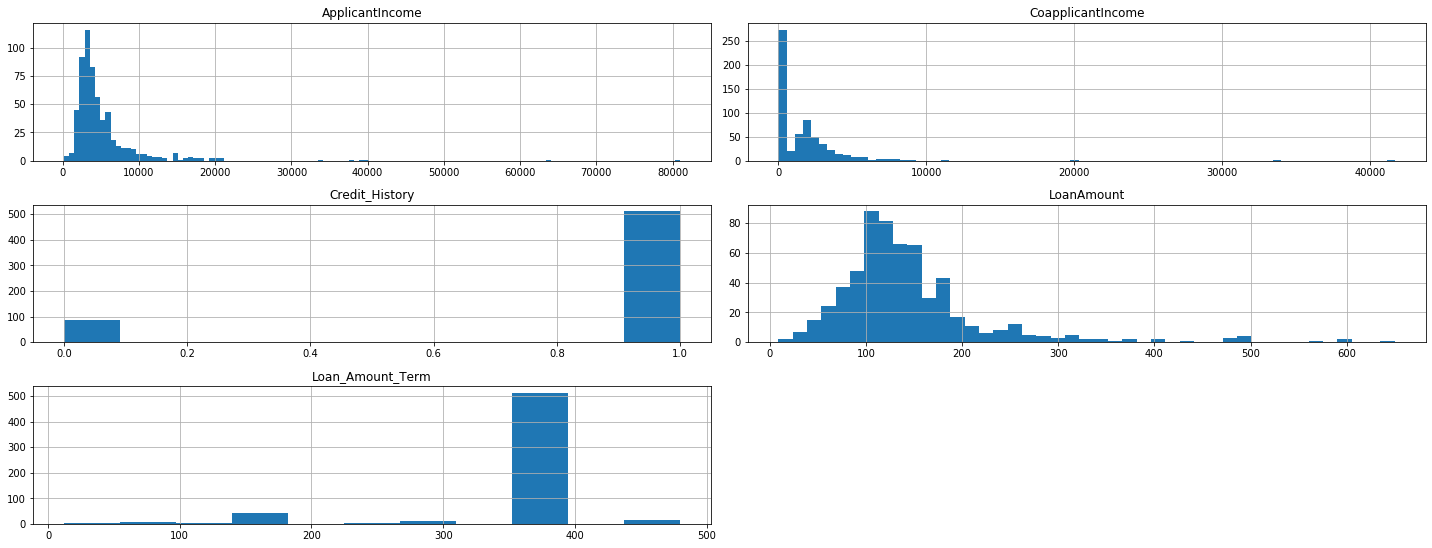

In [231]:
df_loan.hist(figsize = (20,10), layout=(4, 2), bins = 'auto')
plt.tight_layout()
plt.show()

In [232]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan["Loan_Status"]=le.fit_transform(df_loan["Loan_Status"])

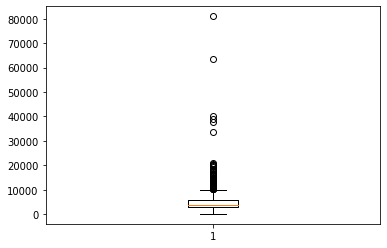

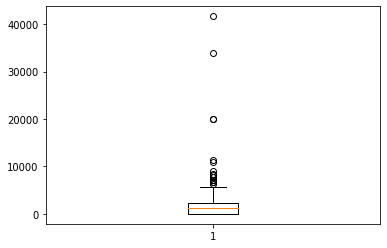

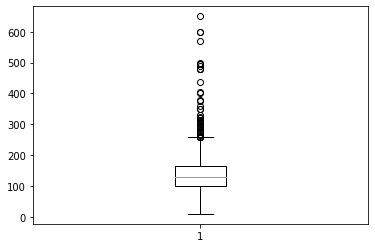

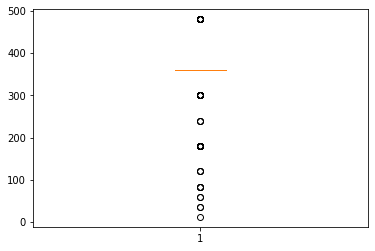

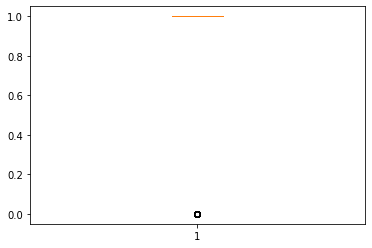

In [233]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']:
    plt.boxplot(df_loan[i])
    plt.show()

In [234]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

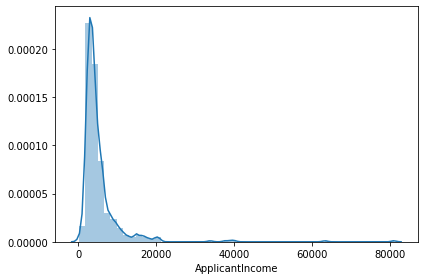

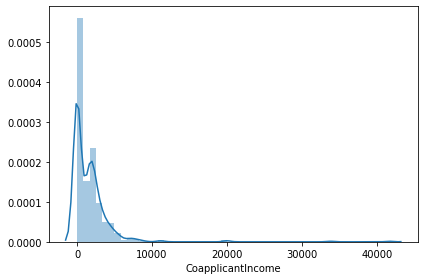

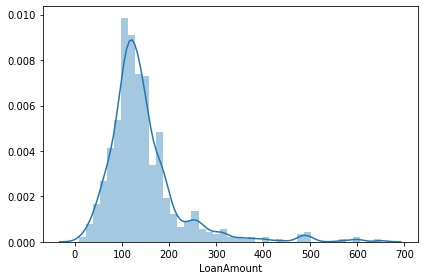

In [235]:
#Checking for the distribution of the data
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    sns.distplot(df_loan[i])
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

In [236]:
#Loan_Status is the target variable taken for the project
#Checking for relationship between different attributes

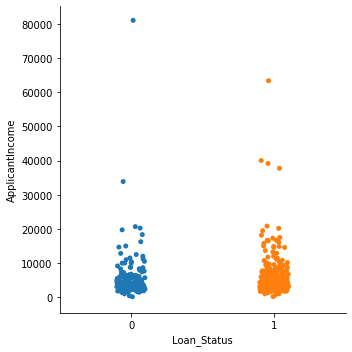

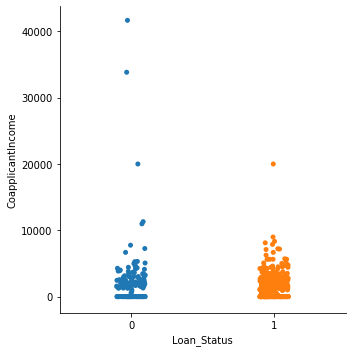

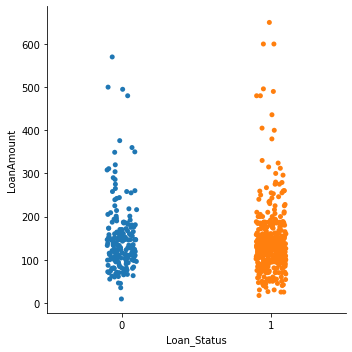

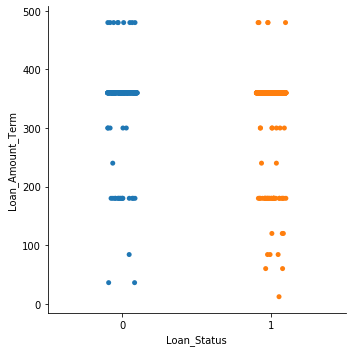

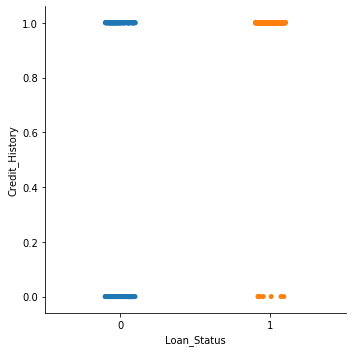

In [237]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']:
    sns.catplot(x='Loan_Status',y=i,data=df_loan)
    plt.tight_layout()
    plt.show()

# MultiVariate Analysis

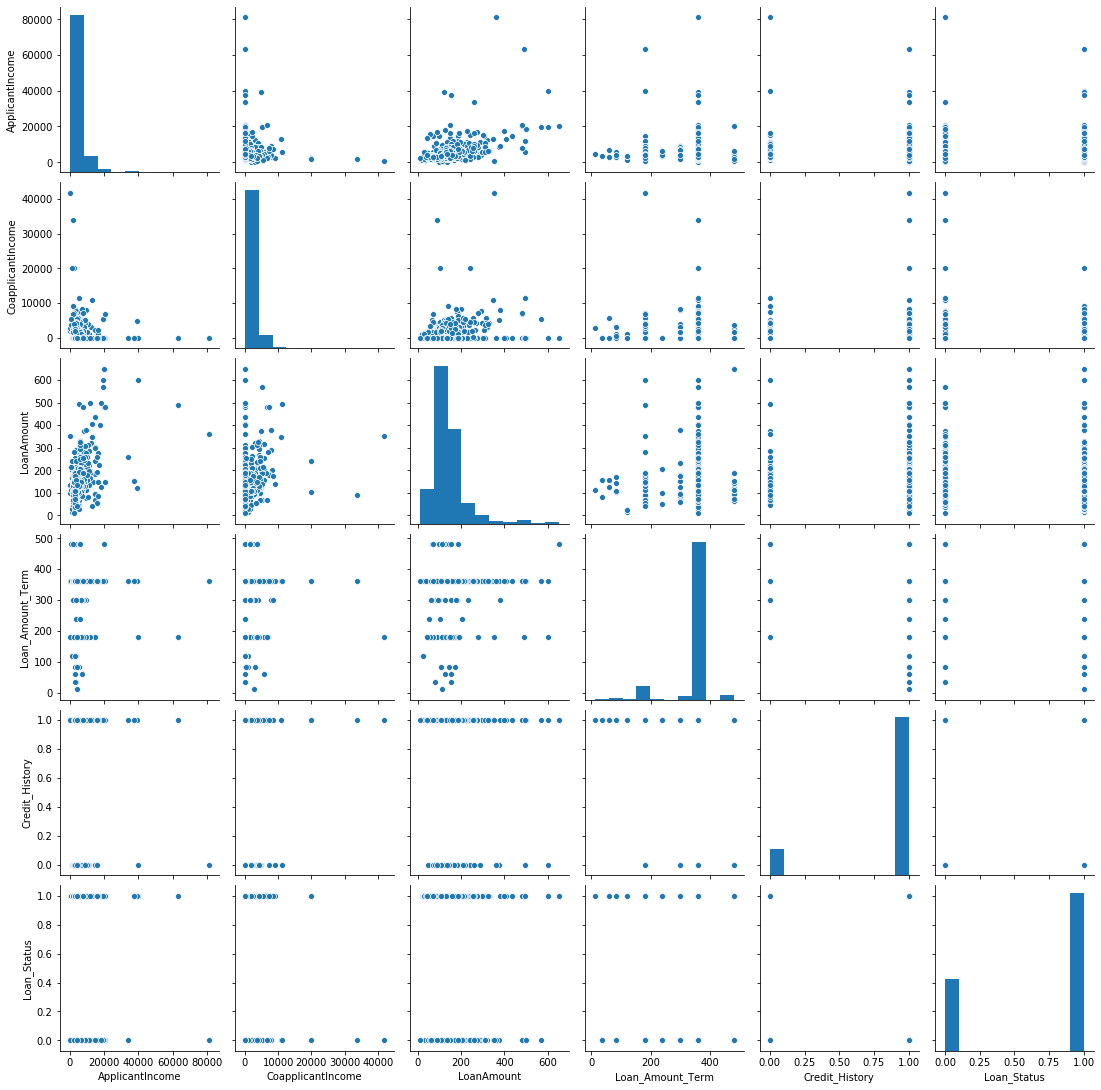

In [238]:
sns.pairplot(df_loan)

In [239]:
df_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.109235,0.524664,-0.036617,-0.033683,-0.025248
CoapplicantIncome,-0.109235,1.000000,0.206104,-0.059922,0.014622,-0.058194
LoanAmount,0.524664,0.206104,1.000000,0.046224,-0.012034,-0.054567
Loan_Amount_Term,-0.036617,-0.059922,0.046224,1.000000,-0.001380,-0.018931
Credit_History,-0.033683,0.014622,-0.012034,-0.001380,1.000000,0.535638
Loan_Status,-0.025248,-0.058194,-0.054567,-0.018931,0.535638,1.000000


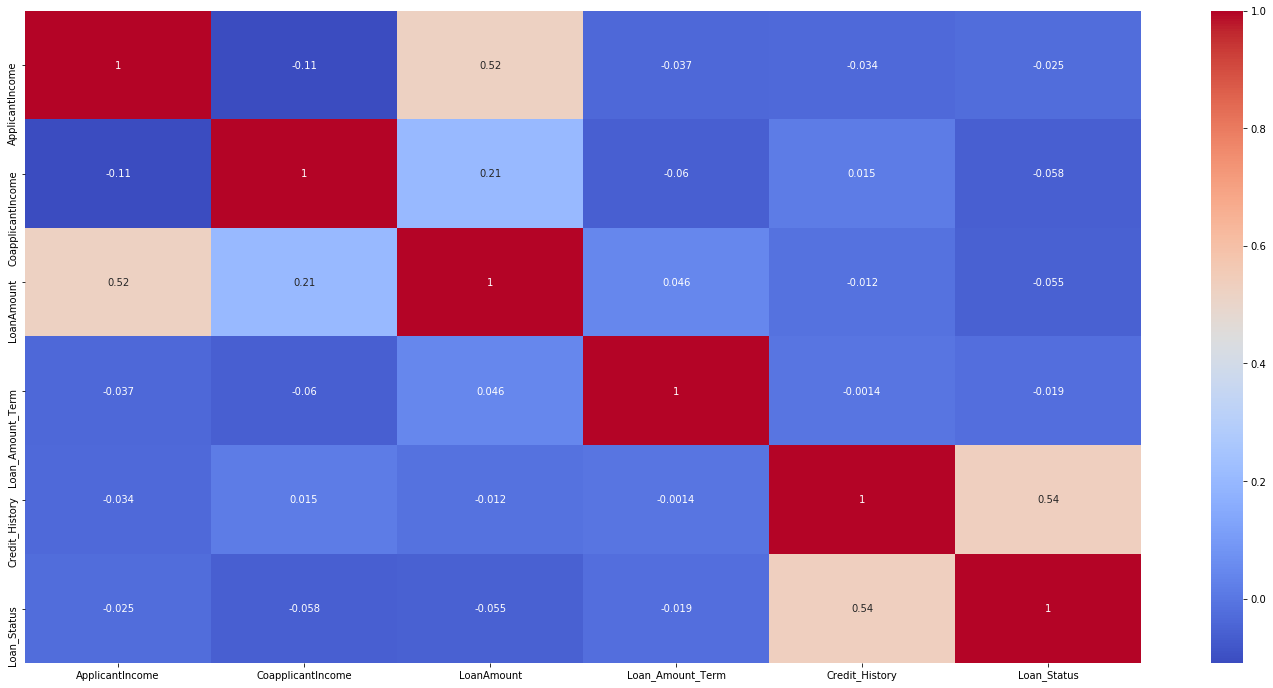

In [240]:
plt.figure(figsize=(25,12))
sns.heatmap(df_loan.corr(),cmap='coolwarm',annot=True)
plt.show()

In [241]:
#Cheking the skewness of data
df_loan.skew()
# From below ouput, we can say Runs,Hits,CG,Saves,Errors have high skewness

ApplicantIncome      6.954134
CoapplicantIncome    7.470981
LoanAmount           2.575583
Loan_Amount_Term    -2.438550
Credit_History      -2.035246
Loan_Status         -0.810024
dtype: float64

In [242]:
#removing skewness using log transform
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']:
        df_loan[col]=np.log1p(df_loan[col])

In [243]:
df_loan.skew()
#skewness is reduced

ApplicantIncome      0.437537
CoapplicantIncome   -0.178589
LoanAmount          -0.236370
Loan_Amount_Term    -2.438550
Credit_History      -2.035246
Loan_Status         -0.810024
dtype: float64

In [244]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]))
print(zscore)
print(np.where(zscore>3))
df_loan_new=df_loan[(zscore<3).all(axis=1)]

[[0.53939139 1.110999   0.26487294 0.27403136 0.40983991]
 [0.15217413 0.77905306 0.00815547 0.27403136 0.40983991]
 [0.5204616  1.110999   1.34878057 0.27403136 0.40983991]
 ...
 [1.05079687 0.30535091 1.37831283 0.27403136 0.40983991]
 [0.95158389 1.110999   0.76257234 0.27403136 0.40983991]
 [0.15217413 1.110999   0.06966309 0.27403136 2.43997713]]
(array([ 14,  14,  67,  93,  93, 127, 130, 130, 152, 152, 179, 181, 211,
       236, 256, 307, 326, 361, 401, 434, 457, 483, 485, 533, 542, 548,
       555, 562, 571, 584], dtype=int64), array([2, 3, 3, 2, 3, 2, 2, 3, 0, 2, 0, 0, 0, 3, 3, 3, 0, 2, 0, 0, 0, 3,
       3, 3, 2, 2, 2, 3, 3, 0], dtype=int64))


In [245]:
print('Before removing outliers:',df_loan.shape)
print('After removing outliers:',df_loan_new.shape)

Before removing outliers: (598, 13)
After removing outliers: (572, 13)


In [246]:
df_loan_new.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [247]:
for i in df_loan_new.columns:
    print(df_loan_new[i].value_counts())

LP002129    1
LP001935    1
LP002266    1
LP002689    1
LP002622    1
           ..
LP002753    1
LP002978    1
LP001516    1
LP001253    1
LP001800    1
Name: Loan_ID, Length: 572, dtype: int64
Male      467
Female    105
Name: Gender, dtype: int64
Yes    370
No     202
Name: Married, dtype: int64
0     339
2      95
1      94
3+     44
Name: Dependents, dtype: int64
Graduate        443
Not Graduate    129
Name: Education, dtype: int64
No     500
Yes     72
Name: Self_Employed, dtype: int64
7.824446    9
8.699681    6
7.863651    6
8.430327    6
8.229778    5
           ..
7.539559    1
7.720462    1
8.295798    1
9.055673    1
9.372289    1
Name: ApplicantIncome, Length: 469, dtype: int64
0.000000    251
7.642044      5
7.418781      5
7.824446      5
7.286192      3
           ... 
7.502186      1
8.006701      1
7.765993      1
7.720462      1
9.102867      1
Name: CoapplicantIncome, Length: 275, dtype: int64
4.993232    21
4.795791    19
4.709530    16
4.615121    15
5.236442    1

In [248]:
df_loan_new.drop(['Loan_ID'],axis=1,inplace=True)

In [249]:
df_loan_final=pd.get_dummies(df_loan_new)

In [250]:
df_loan_final

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.993232,360.0,0.693147,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,0.693147,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,8.006701,0.000000,4.204693,360.0,0.693147,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,7.857094,7.765993,4.795791,360.0,0.693147,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,8.699681,0.000000,4.955827,360.0,0.693147,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,360.0,0.693147,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,8.320448,0.000000,3.713572,180.0,0.693147,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8.996280,5.484797,5.537334,360.0,0.693147,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,8.933796,0.000000,5.236442,360.0,0.693147,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [251]:
#separating into input and output variables
df_x=df_loan_final.drop(columns=['Loan_Status'])
y=pd.DataFrame(df_loan_final['Loan_Status'])

In [252]:
df_x.skew()

ApplicantIncome            0.548690
CoapplicantIncome         -0.199683
LoanAmount                 0.022683
Loan_Amount_Term          -2.175668
Credit_History            -2.000659
Gender_Female              1.639067
Gender_Male               -1.639067
Married_No                 0.616132
Married_Yes               -0.616132
Dependents_0              -0.378154
Dependents_1               1.816329
Dependents_2               1.799217
Dependents_3+              3.183782
Education_Graduate        -1.316965
Education_Not Graduate     1.316965
Self_Employed_No          -2.261693
Self_Employed_Yes          2.261693
Property_Area_Rural        0.889799
Property_Area_Semiurban    0.529367
Property_Area_Urban        0.722957
dtype: float64

In [253]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [255]:
x.shape

(572, 20)

In [256]:
y.shape

(572, 1)

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                                                                                                                   
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [258]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.8347826086956521
confusion matrix corresponding to random state: 42 is: [[16 16]
 [ 3 80]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.84      0.50      0.63        32
           1       0.83      0.96      0.89        83

    accuracy                           0.83       115
   macro avg       0.84      0.73      0.76       115
weighted avg       0.84      0.83      0.82       115


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sha

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 44 is: 0.7739130434782608
confusion matrix corresponding to random state: 44 is: [[18 18]
 [ 8 71]]
classification report corresponding to random state: 44 is:               precision    recall  f1-score   support

           0       0.69      0.50      0.58        36
           1       0.80      0.90      0.85        79

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 46 is: 0.8173913043478261
confusion matrix corresponding to random state: 46 is: [[16 14]
 [ 7 78]]
classification report corresponding to random state: 46 is:               precision    recall  f1-score   support

           0       0.70      0.53      0.60        30
           1       0.85      0.92      0.88        85

    accuracy                           0.82       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 48 is: 0.7913043478260869
confusion matrix corresponding to random state: 48 is: [[11 20]
 [ 4 80]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.73      0.35      0.48        31
           1       0.80      0.95      0.87        84

    accuracy                           0.79       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 50 is: 0.8434782608695652
confusion matrix corresponding to random state: 50 is: [[23 14]
 [ 4 74]]
classification report corresponding to random state: 50 is:               precision    recall  f1-score   support

           0       0.85      0.62      0.72        37
           1       0.84      0.95      0.89        78

    accuracy                           0.84       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 52 is: 0.808695652173913
confusion matrix corresponding to random state: 52 is: [[18 19]
 [ 3 75]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.86      0.49      0.62        37
           1       0.80      0.96      0.87        78

    accuracy                           0.81       115
   macro

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 54 is: 0.7739130434782608
confusion matrix corresponding to random state: 54 is: [[22 22]
 [ 4 67]]
classification report corresponding to random state: 54 is:               precision    recall  f1-score   support

           0       0.85      0.50      0.63        44
           1       0.75      0.94      0.84        71

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 56 is: 0.7478260869565218
confusion matrix corresponding to random state: 56 is: [[14 20]
 [ 9 72]]
classification report corresponding to random state: 56 is:               precision    recall  f1-score   support

           0       0.61      0.41      0.49        34
           1       0.78      0.89      0.83        81

    accuracy                           0.75       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 58 is: 0.8608695652173913
confusion matrix corresponding to random state: 58 is: [[18 11]
 [ 5 81]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.78      0.62      0.69        29
           1       0.88      0.94      0.91        86

    accuracy                           0.86       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 60 is: 0.782608695652174
confusion matrix corresponding to random state: 60 is: [[14 20]
 [ 5 76]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.74      0.41      0.53        34
           1       0.79      0.94      0.86        81

    accuracy                           0.78       115
   macro

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 62 is: 0.8
confusion matrix corresponding to random state: 62 is: [[20 20]
 [ 3 72]]
classification report corresponding to random state: 62 is:               precision    recall  f1-score   support

           0       0.87      0.50      0.63        40
           1       0.78      0.96      0.86        75

    accuracy                           0.80       115
   macro avg       0.8

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 64 is: 0.7391304347826086
confusion matrix corresponding to random state: 64 is: [[23 28]
 [ 2 62]]
classification report corresponding to random state: 64 is:               precision    recall  f1-score   support

           0       0.92      0.45      0.61        51
           1       0.69      0.97      0.81        64

    accuracy                           0.74       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 66 is: 0.7652173913043478
confusion matrix corresponding to random state: 66 is: [[13 21]
 [ 6 75]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           0       0.68      0.38      0.49        34
           1       0.78      0.93      0.85        81

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 68 is: 0.8
confusion matrix corresponding to random state: 68 is: [[15 15]
 [ 8 77]]
classification report corresponding to random state: 68 is:               precision    recall  f1-score   support

           0       0.65      0.50      0.57        30
           1       0.84      0.91      0.87        85

    accuracy                           0.80       115
   macro avg       0.7

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 70 is: 0.7652173913043478
confusion matrix corresponding to random state: 70 is: [[10 22]
 [ 5 78]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0       0.67      0.31      0.43        32
           1       0.78      0.94      0.85        83

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 72 is: 0.7565217391304347
confusion matrix corresponding to random state: 72 is: [[12 22]
 [ 6 75]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.67      0.35      0.46        34
           1       0.77      0.93      0.84        81

    accuracy                           0.76       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 74 is: 0.7565217391304347
confusion matrix corresponding to random state: 74 is: [[13 27]
 [ 1 74]]
classification report corresponding to random state: 74 is:               precision    recall  f1-score   support

           0       0.93      0.33      0.48        40
           1       0.73      0.99      0.84        75

    accuracy                           0.76       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 76 is: 0.7652173913043478
confusion matrix corresponding to random state: 76 is: [[20 25]
 [ 2 68]]
classification report corresponding to random state: 76 is:               precision    recall  f1-score   support

           0       0.91      0.44      0.60        45
           1       0.73      0.97      0.83        70

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 78 is: 0.7652173913043478
confusion matrix corresponding to random state: 78 is: [[18 24]
 [ 3 70]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.86      0.43      0.57        42
           1       0.74      0.96      0.84        73

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 80 is: 0.8
confusion matrix corresponding to random state: 80 is: [[16 17]
 [ 6 76]]
classification report corresponding to random state: 80 is:               precision    recall  f1-score   support

           0       0.73      0.48      0.58        33
           1       0.82      0.93      0.87        82

    accuracy                           0.80       115
   macro avg       0.7

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 82 is: 0.808695652173913
confusion matrix corresponding to random state: 82 is: [[21 17]
 [ 5 72]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.81      0.94      0.87        77

    accuracy                           0.81       115
   macro

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 84 is: 0.7913043478260869
confusion matrix corresponding to random state: 84 is: [[20 17]
 [ 7 71]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0       0.74      0.54      0.62        37
           1       0.81      0.91      0.86        78

    accuracy                           0.79       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 86 is: 0.8173913043478261
confusion matrix corresponding to random state: 86 is: [[17 16]
 [ 5 77]]
classification report corresponding to random state: 86 is:               precision    recall  f1-score   support

           0       0.77      0.52      0.62        33
           1       0.83      0.94      0.88        82

    accuracy                           0.82       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 88 is: 0.7652173913043478
confusion matrix corresponding to random state: 88 is: [[18 24]
 [ 3 70]]
classification report corresponding to random state: 88 is:               precision    recall  f1-score   support

           0       0.86      0.43      0.57        42
           1       0.74      0.96      0.84        73

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 90 is: 0.7739130434782608
confusion matrix corresponding to random state: 90 is: [[18 16]
 [10 71]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.64      0.53      0.58        34
           1       0.82      0.88      0.85        81

    accuracy                           0.77       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 92 is: 0.808695652173913
confusion matrix corresponding to random state: 92 is: [[19 20]
 [ 2 74]]
classification report corresponding to random state: 92 is:               precision    recall  f1-score   support

           0       0.90      0.49      0.63        39
           1       0.79      0.97      0.87        76

    accuracy                           0.81       115
   macro

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 94 is: 0.7913043478260869
confusion matrix corresponding to random state: 94 is: [[19 15]
 [ 9 72]]
classification report corresponding to random state: 94 is:               precision    recall  f1-score   support

           0       0.68      0.56      0.61        34
           1       0.83      0.89      0.86        81

    accuracy                           0.79       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 96 is: 0.8173913043478261
confusion matrix corresponding to random state: 96 is: [[13 15]
 [ 6 81]]
classification report corresponding to random state: 96 is:               precision    recall  f1-score   support

           0       0.68      0.46      0.55        28
           1       0.84      0.93      0.89        87

    accuracy                           0.82       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 98 is: 0.7565217391304347
confusion matrix corresponding to random state: 98 is: [[21 26]
 [ 2 66]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0       0.91      0.45      0.60        47
           1       0.72      0.97      0.82        68

    accuracy                           0.76       115
   macr

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 100 is: 0.8
confusion matrix corresponding to random state: 100 is: [[13 18]
 [ 5 79]]
classification report corresponding to random state: 100 is:               precision    recall  f1-score   support

           0       0.72      0.42      0.53        31
           1       0.81      0.94      0.87        84

    accuracy                           0.80       115
   macro avg       

In [259]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 58 is 0.8869565217391304 and model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [260]:
LR=LogisticRegression()
SV=SVC()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()

In [261]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

*********** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.8173913043478261


roc_auc_score= 0.6714669738863288


classification_report
               precision    recall  f1-score   support

           0       0.92      0.35      0.51        31
           1       0.81      0.99      0.89        84

    accuracy                           0.82       115
   macro avg       0.86      0.67      0.70       115
weighted avg       0.84      0.82      0.79       115



[[11 20]
 [ 1 83]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ***********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='o

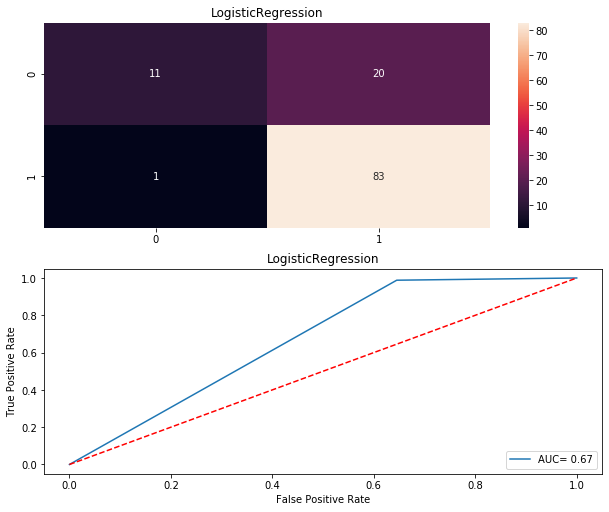

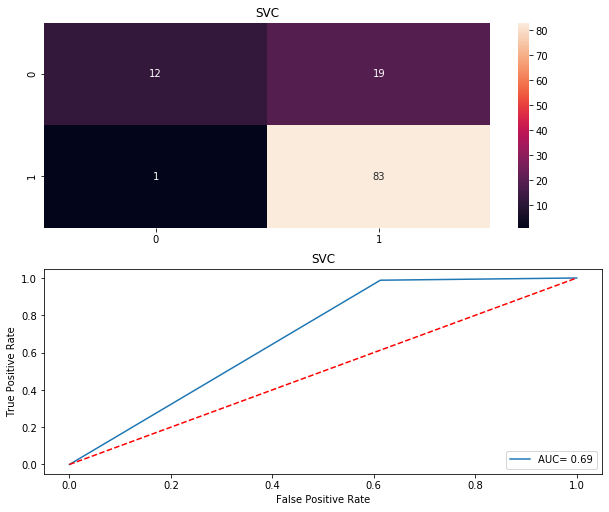

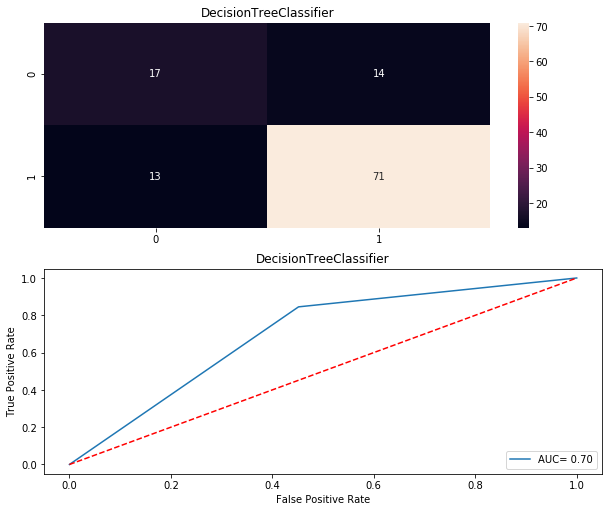

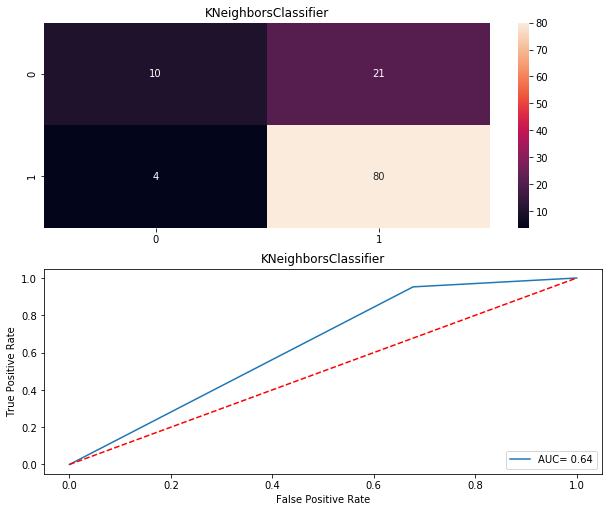

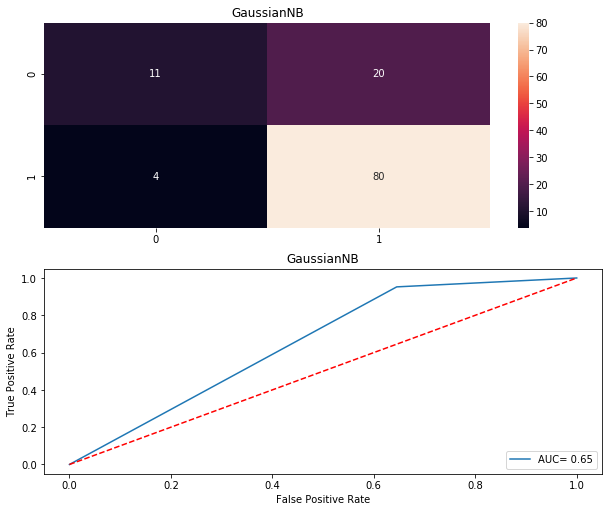

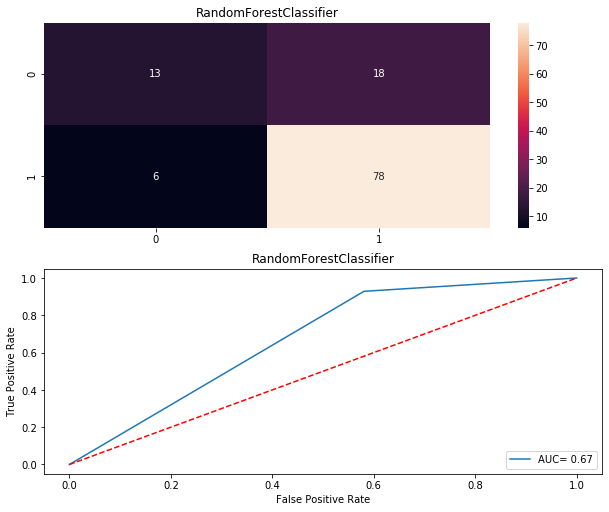

In [262]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,pre) #
    roc_auc= auc(false_positive_rate,true_positive_rate) #
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')   

In [263]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.linear_model.LogisticRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8        0.8        0.79824561 0.84210526 0.83333333]
0.8147368421052631
0.018979829243927722


In [275]:
#We tried all methods and till now LogisticRegression is the best option 
#Random state corresponding to highest r2 score is 58
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=0.20)
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [277]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(LR,"Project7_Loan.pkl")

['Project7_Loan.pkl']